# Sentiment Analysis of Financial News Using NLTK

We have to predict the sentiment of fiancial news using nltk

#About Dataset

This dataset contains 3 csv file

cnbc headline   (3080, 3)

gaurdian headline   (17800, 2)

reuters headline   (32770, 3)


# Columns Provided in the Dataset

cnbc headline
1. time
2. headlines
3. Description

gaurdian headline
1. time
2. headline

reuters headline
1. time
2. headline
3. description


# What is NLTK ?

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).

It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.


https://medium.com/@ODSC/intro-to-language-processing-with-the-nltk-59aa26b9d056



# What is sentiment analysis ?

Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.



https://monkeylearn.com/sentiment-analysis/

In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# Import all the required libraries 
import numpy as np
import pandas as pd
import re
import string


#import stopwords and text processing libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("punkt")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
#import machine learning libraries

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Basic EDA on cnbc_headlines dataset

In [9]:
# Read csv file of cnbc headlines using pandas
cnbc_head = pd.read_csv("cnbc_headlines.csv")

In [10]:
cnbc_head.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [11]:
# check the shape of cnbc headline dataset
cnbc_head.shape

(3080, 3)

In [12]:
# Check all the columns in the cnbc headline dataset
cnbc_head.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [13]:
# Check which columns are having categorical, numerical or boolean values
cnbc_head.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [14]:
# Check for missing values in all the columnns of cnbc headline dataset
cnbc_head.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

There is 280 missing values in headlines, description and time

In [15]:
 # drop nan values in cnbc headline dataset
cnbc_head.dropna(inplace = True)

In [16]:
# drop the duplicate rows in the dataset keep the first one
cnbc_head = cnbc_head.drop_duplicates(subset = ["Headlines", "Description"], keep = "first")
cnbc_head.reset_index(drop = True, inplace = True)

In [17]:
# check the shape of cnbc headline dataset
cnbc_head.shape

(2790, 3)

# Basic EDA on Gaurdian headlines dataset

In [18]:
# Read csv file of gaurdian headlines using pandas
guardian_head = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cloud-ML Projects/Sentimental Analysis/guardian_headlines.csv")

In [19]:
guardian_head.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [20]:
#check the shape of gaurdian headline dataset
guardian_head.shape

(17800, 2)

In [21]:
#check columns of gaurdian headline
guardian_head.shape

(17800, 2)

In [22]:
# Check which columns are having categorical, numerical or boolean values
guardian_head.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


In [23]:
# check null values in gaurdian headlines dataset
guardian_head.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [24]:
# drop duplicate rows in headlines and keep the first one
guardian_head.drop_duplicates(subset = "Headlines", keep = "first", inplace = True)


In [34]:
guardian_head.reset_index(drop = True, inplace = True)


# Basic EDA on reuters headlines

In [25]:
# Read csv file of reuters headlines using using pandas
reuters_head = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cloud-ML Projects/Sentimental Analysis/reuters_headlines.csv")

In [27]:
reuters_head.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [28]:
#check the shape of reuters headlines dataset
reuters_head.shape

(32770, 3)

In [29]:
#check the columns of reuters headline dataset
reuters_head.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [30]:
# Check which columns are having categorical, numerical or boolean values
reuters_head.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [31]:
# Check for missing values in all the columnns of reuters headlines dataset
reuters_head.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [33]:
#drop the duplicate rows in reuters headlines dataset and keep the first one
reuters_head.drop_duplicates(subset= ["Headlines", "Description"], inplace = True, keep = "first")
reuters_head.reset_index(drop = True, inplace = True)
reuters_head.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


#Making some functions that we will need  ahead

Preprocessing 

1. **Lowercase** - It is necessary to convert the text to lower case as it is case sensitive.

2. **remove punctuations** -  The punctuations present in the text do not add value to the data. The punctuation, when attached to any word, will create a problem in differentiating with other words. so we have to get rid of them.

3. **remove stopwords** -  Stopwords include: I, he, she, and, but, was were, being, have, etc, which do not add meaning to the data. So these words must be removed which helps to reduce the features from our data. These are removed after tokenizing the text.

4. **stemming** -  A technique that takes the word to its root form. It just removes suffixes from the words. The stemmed word might not be part of the dictionary, i.e it will not necessarily give meaning.

5. **lemmatizing** -  Takes the word to its root form called Lemma. It helps to bring words to their dictionary form. It is applied to nouns by default. It is more accurate as it uses more informed analysis to create groups of words with similar meanings based on the context, so it is complex and takes more time. This is used where we need to retain the contextual information.


https://youtu.be/lMQzEk5vht4

https://www.pluralsight.com/guides/importance-of-text-pre-processing

In [160]:
# create a function for preprocessing 
def preprocessing_text(text):

    #convert all to lowercase
    text= text.lower()

    #remove puntuations
    text = text.translate(str.maketrans("", "", string.punctuation))

    #remove stopword
    stop_word = set(stopwords.words('english'))
    text_tokens = word_tokenize(text)
    filtered_words = [word for word in text_tokens if word not in stop_word]

    #stemming
    ps = PorterStemmer()
    Stemmed_words = [ps.stem(w) for w in filtered_words]


    #lemmitizing
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(s, pos = 'a') for s in Stemmed_words]

    return " ".join(lemma_words)
  

SENTIMENT ANAYSIS

https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [161]:
# import sentiment intensity analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

# create sentiment intensity analyzer object
analyser = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [162]:
#fuction to  decide sentiment as positive, negative and neutral
def get_analysis(score):
  if score < 0.0:
    return 'Negative'
  elif score == 0.0:
    return 'Neutral'
  else:
    return 'Positive'    

# Now working with description on datasets

In [163]:
# concatenate cnbc headlines dataset and reuters headline dataset
new_data = pd.concat([cnbc_head, reuters_head], axis = 0)

In [164]:
#check the shape of this new dataset
new_data.shape

(35463, 3)

In [165]:
#make a copy of new dataset 
new_data_copy = new_data.copy()

In [166]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [167]:
# apply preprocessing to the description of new dataset

new_data["Description"] = new_data["Description"].apply(preprocessing_text)
new_data.head(20)

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...
5,Cramer's lightning round: I would just stay lo...,"7:23 PM ET Thu, 16 July 2020",mad money host jim cramer ring lightn round be...
6,Acorns CEO: Parents can turn $5 into five figu...,"8:03 PM ET Thu, 16 July 2020",invest 5 per day compound 70000 time child rea...
7,Dividend cuts may mean rethinking your retirem...,"8:54 AM ET Thu, 16 July 2020",hundr compani cut suspend dividend far year se...
8,StockX has authenticated 1 million Jordan snea...,"8:25 PM ET Wed, 15 July 2020",weve abl captur cultur moment like espn releas...
9,Biohaven Pharmaceuticals lands Khloe Kardashia...,"7:51 PM ET Wed, 15 July 2020",biohaven ceo vlad coric said compani brought k...


In [168]:
# analyze polarity score of values in description and  add new column of it in dataset
ds_score = []
for value in new_data["Description"].values:
  ds_score.append(analyser.polarity_scores(value)['compound'])
new_data["ds_score"] = ds_score 
new_data 

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,0.2500
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,-0.4939
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,0.5574
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,0.7096
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,-0.6486
...,...,...,...,...
32668,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,0.0000
32669,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,0.0000
32670,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,-0.2732
32671,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,-0.3818


In [169]:
# apply the function  which decides sentiment to  polarity score column
new_data["ds_score"] = new_data["ds_score"].apply(get_analysis)
new_data

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative
...,...,...,...,...
32668,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,Neutral
32669,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,Neutral
32670,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,Negative
32671,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,Negative


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



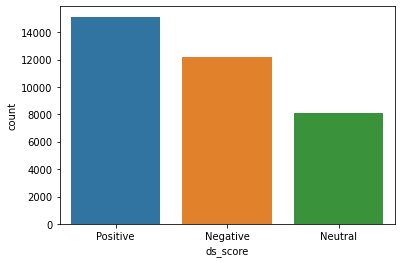

In [170]:
# plot a count plot on description score column
import seaborn as sns
sns.countplot(new_data["ds_score"])

In the description 

there are approx

14000 positive statment

12000 negative statment

8000 neutral statment

In [171]:
# pie chart on description score column
import plotly.express as px
fig = px.pie(new_data, names = "ds_score", title = "Pie chart of different sentiments")
fig

In the dataset 

description contains

42.6% positive statments

34.5% negtive statements

22.9% neutral statments

# Modelling on description 

In [172]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212
x_train_ds, x_test_ds, y_train_ds, y_test_ds = train_test_split(new_data["Description"], new_data.ds_score, test_size = 0.1, random_state = 212)

LINEAR SUPPORT VECTOR MACHINE


In [173]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model
pipe = Pipeline([
                 ("tfidf", TfidfVectorizer()),
                 ("model", LinearSVC()) 
])

linear_svc_model = pipe.fit(x_train_ds, y_train_ds)

# Fit the pipeline to the data
prediction = linear_svc_model.predict(x_test_ds)
print("Model Linear SVC")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_ds, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_ds, prediction))
#print classification report
print(classification_report(y_test_ds, prediction))


Model Linear SVC
93.43
[[1122   48   54]
 [  26  771   19]
 [  53   33 1421]]
              precision    recall  f1-score   support

    Negative       0.93      0.92      0.93      1224
     Neutral       0.90      0.94      0.92       816
    Positive       0.95      0.94      0.95      1507

    accuracy                           0.93      3547
   macro avg       0.93      0.93      0.93      3547
weighted avg       0.93      0.93      0.93      3547

CPU times: user 3.2 s, sys: 52 ms, total: 3.25 s
Wall time: 3.66 s


LOGISTIC REGRESSION


In [174]:
%%time
# pipeline creation
# 1. TfidfTransformer
# 2. LogisticRegression model
# 3. CountVectorization
pipe = Pipeline([
                 ("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("model", LogisticRegression())
                 
])

log_reg_model = pipe.fit(x_train_ds, y_train_ds)

# Fit the pipeline to the data
prediction = log_reg_model.predict(x_test_ds)
print("Model LogisticRegression")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_ds, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_ds, prediction))
#print classification report
print(classification_report(y_test_ds, prediction))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model LogisticRegression
89.48
[[1048   93   83]
 [  44  740   32]
 [  69   52 1386]]
              precision    recall  f1-score   support

    Negative       0.90      0.86      0.88      1224
     Neutral       0.84      0.91      0.87       816
    Positive       0.92      0.92      0.92      1507

    accuracy                           0.89      3547
   macro avg       0.89      0.89      0.89      3547
weighted avg       0.90      0.89      0.89      3547

CPU times: user 6.89 s, sys: 3.87 s, total: 10.8 s
Wall time: 7.41 s


MULTINOMIAL NAIVE BAYES


In [175]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB
 
pipe = Pipeline([
                 ("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("model", MultinomialNB())
                 
])

nb_model = pipe.fit(x_train_ds, y_train_ds)

# Fit the pipeline to the data
prediction = nb_model.predict(x_test_ds)
print("Model Multinomial")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_ds, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_ds, prediction))
#print classification report
print(classification_report(y_test_ds, prediction))

Model Multinomial
62.31
[[ 729    8  487]
 [ 155   98  563]
 [ 117    7 1383]]
              precision    recall  f1-score   support

    Negative       0.73      0.60      0.66      1224
     Neutral       0.87      0.12      0.21       816
    Positive       0.57      0.92      0.70      1507

    accuracy                           0.62      3547
   macro avg       0.72      0.54      0.52      3547
weighted avg       0.69      0.62      0.57      3547

CPU times: user 1.03 s, sys: 40.6 ms, total: 1.07 s
Wall time: 1.07 s


BERNOULLI NAIVE BAYES


In [176]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

pipe = Pipeline([
                 ("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("model", BernoulliNB())
                 
])

nb_model_ber = pipe.fit(x_train_ds, y_train_ds)

# Fit the pipeline to the data
prediction = nb_model_ber.predict(x_test_ds)
print("Model BernoulliNB")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_ds, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_ds, prediction))
#print classification report
print(classification_report(y_test_ds, prediction))

Model BernoulliNB
73.61
[[ 879   70  275]
 [ 127  496  193]
 [ 198   73 1236]]
              precision    recall  f1-score   support

    Negative       0.73      0.72      0.72      1224
     Neutral       0.78      0.61      0.68       816
    Positive       0.73      0.82      0.77      1507

    accuracy                           0.74      3547
   macro avg       0.74      0.72      0.73      3547
weighted avg       0.74      0.74      0.73      3547

CPU times: user 1.1 s, sys: 19.9 ms, total: 1.12 s
Wall time: 1.13 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [177]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier
pipe = Pipeline([
                 ("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("model", GradientBoostingClassifier())
                 
])

gb_model = pipe.fit(x_train_ds, y_train_ds)

# Fit the pipeline to the data
prediction = gb_model.predict(x_test_ds)
print("Model BernoulliNB")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_ds, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_ds, prediction))
#print classification report
print(classification_report(y_test_ds, prediction))

Model BernoulliNB
84.01
[[ 890  179  155]
 [   9  796   11]
 [  77  136 1294]]
              precision    recall  f1-score   support

    Negative       0.91      0.73      0.81      1224
     Neutral       0.72      0.98      0.83       816
    Positive       0.89      0.86      0.87      1507

    accuracy                           0.84      3547
   macro avg       0.84      0.85      0.84      3547
weighted avg       0.86      0.84      0.84      3547

CPU times: user 1min 48s, sys: 3.45 s, total: 1min 51s
Wall time: 2min 11s


XGBOOST CLASSIFICATION MODEL


In [178]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier
pipe = Pipeline([
                 ("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("model", XGBClassifier())
                 
])

xgb_model = pipe.fit(x_train_ds, y_train_ds)

# Fit the pipeline to the data
prediction = xgb_model.predict(x_test_ds)
print("Model BernoulliNB")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_ds, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_ds, prediction))
#print classification report
print(classification_report(y_test_ds, prediction))

Model BernoulliNB
81.56
[[ 846  202  176]
 [   8  796   12]
 [  70  186 1251]]
              precision    recall  f1-score   support

    Negative       0.92      0.69      0.79      1224
     Neutral       0.67      0.98      0.80       816
    Positive       0.87      0.83      0.85      1507

    accuracy                           0.82      3547
   macro avg       0.82      0.83      0.81      3547
weighted avg       0.84      0.82      0.82      3547

CPU times: user 50.8 s, sys: 164 ms, total: 51 s
Wall time: 1min 10s


DECISION TREE CLASSIFICATION MODEL


In [179]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier
pipe = Pipeline([
                 ("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("model", DecisionTreeClassifier())
                 
])

dt_model = pipe.fit(x_train_ds, y_train_ds)

# Fit the pipeline to the data
prediction = dt_model.predict(x_test_ds)
print("Model BernoulliNB")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_ds, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_ds, prediction))
#print classification report
print(classification_report(y_test_ds, prediction))

Model BernoulliNB
87.37
[[1011   24  189]
 [  11  791   14]
 [ 196   14 1297]]
              precision    recall  f1-score   support

    Negative       0.83      0.83      0.83      1224
     Neutral       0.95      0.97      0.96       816
    Positive       0.86      0.86      0.86      1507

    accuracy                           0.87      3547
   macro avg       0.88      0.89      0.88      3547
weighted avg       0.87      0.87      0.87      3547

CPU times: user 21.5 s, sys: 31.3 ms, total: 21.6 s
Wall time: 21.7 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [180]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier
pipe = Pipeline([
                 ("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("model", KNeighborsClassifier())
                 
])

knn_model = pipe.fit(x_train_ds, y_train_ds)

# Fit the pipeline to the data
prediction = knn_model.predict(x_test_ds)
print("Model KNeighborsClassifier")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_ds, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_ds, prediction))
#print classification report
print(classification_report(y_test_ds, prediction))

Model KNeighborsClassifier
53.45
[[741 199 284]
 [259 316 241]
 [394 274 839]]
              precision    recall  f1-score   support

    Negative       0.53      0.61      0.57      1224
     Neutral       0.40      0.39      0.39       816
    Positive       0.62      0.56      0.58      1507

    accuracy                           0.53      3547
   macro avg       0.52      0.52      0.51      3547
weighted avg       0.54      0.53      0.53      3547

CPU times: user 6.42 s, sys: 2.37 s, total: 8.79 s
Wall time: 9.83 s


In [181]:
# helper function for comparing models matric
def compare_models(models, names, x_train_ds, y_train_ds, x_test_ds, y_test_ds):

    # the libraries we need
    

    # create a dataframe with column matric and metric name as value
    for (model, name) in zip(models, names):
      print(name)
      y_pred = model.predict(x_test_ds)
      res = classification_report(y_pred, y_test_ds)
      print("Classification Report\n", res)
      print("-------------------------------------------------------------------------------------------")
   
    # then predict on the test set
    

In [182]:
# list of model objects
models = [linear_svc_model,log_reg_model,nb_model, nb_model_ber, gb_model, xgb_model, dt_model,knn_model]
# list of model names
names = ["linearSVC", "logistic", "MultinomialNB", "BernoulliNB", "GradientBoost", "XGB", "DecisionTree", "KNN"]
# print the comparison of models
compare_models(models, names, x_train_ds, y_train_ds, x_test_ds, y_test_ds)

linearSVC
Classification Report
               precision    recall  f1-score   support

    Negative       0.92      0.93      0.93      1201
     Neutral       0.94      0.90      0.92       852
    Positive       0.94      0.95      0.95      1494

    accuracy                           0.93      3547
   macro avg       0.93      0.93      0.93      3547
weighted avg       0.93      0.93      0.93      3547

-------------------------------------------------------------------------------------------
logistic
Classification Report
               precision    recall  f1-score   support

    Negative       0.86      0.90      0.88      1161
     Neutral       0.91      0.84      0.87       885
    Positive       0.92      0.92      0.92      1501

    accuracy                           0.89      3547
   macro avg       0.89      0.89      0.89      3547
weighted avg       0.90      0.89      0.89      3547

---------------------------------------------------------------------------------

# working with test dataset

In [183]:
# Perforn the prediction on the test dataset
y_predicted = linear_svc_model.predict(x_test_ds)
y_predicted

array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Positive',
       'Neutral'], dtype=object)

In [184]:
# creating a dataframe of predicted results 
result = pd.DataFrame(y_predicted)

In [185]:
result

,0
0,Negative
1,Negative
2,Negative
3,Negative
4,Positive
...,...
3542,Negative
3543,Positive
3544,Negative
3545,Positive


# Now working with headlines + description

In [186]:
# merge headlines and description of new dataset and name it info
new_data.head()

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative


In [187]:
# only keep info and time column . drop all remaining columns
new_data["info"] = new_data["Headlines"] + new_data["Description"]
new_data.head()

,Headlines,Time,Description,ds_score,info
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative,Cramer's lightning round: I would own Teradyne...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive,"Cramer's week ahead: Big week for earnings, ev..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive,IQ Capital CEO Keith Bliss says tech and healt...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative,Wall Street delivered the 'kind of pullback I'...


In [188]:
new_data = new_data.drop(["Headlines", "Description", "ds_score"], axis = 1)

In [189]:
new_data.head()

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",Jim Cramer: A better way to invest in the Covi...
1,"7:33 PM ET Fri, 17 July 2020",Cramer's lightning round: I would own Teradyne...
2,"7:25 PM ET Fri, 17 July 2020","Cramer's week ahead: Big week for earnings, ev..."
3,"4:24 PM ET Fri, 17 July 2020",IQ Capital CEO Keith Bliss says tech and healt...
4,"7:36 PM ET Thu, 16 July 2020",Wall Street delivered the 'kind of pullback I'...


In [190]:
# apply preprocessing on info column
new_data["info"] = new_data["info"].apply(preprocessing_text)
new_data.head() 

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...


In [191]:
# analyze polarity score of values in info and  add new column of it in dataset
info_score = []
for value in new_data["info"].values:
  info_score.append(analyser.polarity_scores(value)['compound'])
new_data["info_score"] = info_score 
new_data 

,Time,info,info_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...,0.7964
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,0.0000
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...,0.3612
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,0.8625
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,-0.2263
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,0.0000
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,0.0000
32670,Mar 20 2018,mcdonald set greenhous ga reduct targetsmcdona...,-0.2732
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,-0.3818


In [192]:
# apply the function  which decides sentiment to  polarity score column
new_data["info_score"] = new_data["info_score"].apply(get_analysis)
new_data

,Time,info,info_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...,Positive
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,Neutral
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...,Positive
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,Positive
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,Negative
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,Neutral
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,Neutral
32670,Mar 20 2018,mcdonald set greenhous ga reduct targetsmcdona...,Negative
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,Negative


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



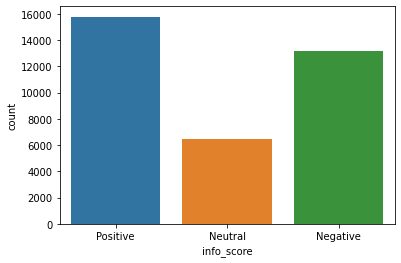

In [193]:
# perform count plot on info_score column
sns.countplot(new_data["info_score"])

In the info

there are approx

15500 positive statment

13000 negative statment

6500 neutral statment

In [194]:
# perform pie chart on info_score column
# pie chart on description score column
import plotly.express as px
fig = px.pie(new_data, names = "info_score", title = "Pie chart of different sentiments")
fig

In the dataset

info contains

44.5% positive statments

37.2% negtive statements

18.3% neutral statments

# modeling on headlines + description

In [195]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212
x_train_info, x_test_info, y_train_info, y_test_info = train_test_split(new_data["info"], new_data.info_score, test_size = 0.1, random_state = 212)

LINEAR SUPPORT VECTOR MACHINE


In [196]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model
pipe = Pipeline([
                 ("tfidf", TfidfVectorizer()),
                 ("model", LinearSVC()) 
])

linear_svc_model = pipe.fit(x_train_info, y_train_info)

# Fit the pipeline to the data
prediction = linear_svc_model.predict(x_test_info)
print("Model Linear SVC")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_info, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_info, prediction))
#print classification report
print(classification_report(y_test_info, prediction))


Model Linear SVC
90.7
[[1183   57   83]
 [  45  565   48]
 [  55   42 1469]]
              precision    recall  f1-score   support

    Negative       0.92      0.89      0.91      1323
     Neutral       0.85      0.86      0.85       658
    Positive       0.92      0.94      0.93      1566

    accuracy                           0.91      3547
   macro avg       0.90      0.90      0.90      3547
weighted avg       0.91      0.91      0.91      3547

CPU times: user 2.12 s, sys: 9.73 ms, total: 2.13 s
Wall time: 2.17 s


LOGISTIC REGRESSION


In [197]:
%%time
# pipeline creation
# 1. TfidfTransformer
# 2. LogisticRegression model
# 3. CountVectorization
pipe = Pipeline([
                 ("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("model", LogisticRegression())
                 
])

log_reg_model = pipe.fit(x_train_info, y_train_info)

# Fit the pipeline to the data
prediction = log_reg_model.predict(x_test_info)
print("Model LogisticRegression")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_info, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_info, prediction))
#print classification report
print(classification_report(y_test_info, prediction))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model LogisticRegression
86.86
[[1139   68  116]
 [  81  495   82]
 [  80   39 1447]]
              precision    recall  f1-score   support

    Negative       0.88      0.86      0.87      1323
     Neutral       0.82      0.75      0.79       658
    Positive       0.88      0.92      0.90      1566

    accuracy                           0.87      3547
   macro avg       0.86      0.85      0.85      3547
weighted avg       0.87      0.87      0.87      3547

CPU times: user 8.95 s, sys: 5.31 s, total: 14.3 s
Wall time: 8.26 s


MULTINOMIAL NAIVE BAYES


In [198]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB
 
pipe = Pipeline([
                 ("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("model", MultinomialNB())
                 
])

nb_model = pipe.fit(x_train_info, y_train_info)

# Fit the pipeline to the data
prediction = nb_model.predict(x_test_info)
print("Model Multinomial")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_info, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_info, prediction))
#print classification report
print(classification_report(y_test_info, prediction))

Model Multinomial
62.9
[[ 780    1  542]
 [ 145    9  504]
 [ 122    2 1442]]
              precision    recall  f1-score   support

    Negative       0.74      0.59      0.66      1323
     Neutral       0.75      0.01      0.03       658
    Positive       0.58      0.92      0.71      1566

    accuracy                           0.63      3547
   macro avg       0.69      0.51      0.47      3547
weighted avg       0.67      0.63      0.56      3547

CPU times: user 1.34 s, sys: 12.9 ms, total: 1.35 s
Wall time: 1.35 s


BERNOULLI NAIVE BAYES


In [199]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

pipe = Pipeline([
                 ("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("model", BernoulliNB())
                 
])

nb_model_ber = pipe.fit(x_train_info, y_train_info)

# Fit the pipeline to the data
prediction = nb_model_ber.predict(x_test_info)
print("Model BernoulliNB")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_info, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_info, prediction))
#print classification report
print(classification_report(y_test_info, prediction))

Model BernoulliNB
68.54
[[ 947   13  363]
 [ 173  154  331]
 [ 217   19 1330]]
              precision    recall  f1-score   support

    Negative       0.71      0.72      0.71      1323
     Neutral       0.83      0.23      0.36       658
    Positive       0.66      0.85      0.74      1566

    accuracy                           0.69      3547
   macro avg       0.73      0.60      0.61      3547
weighted avg       0.71      0.69      0.66      3547

CPU times: user 1.34 s, sys: 8.99 ms, total: 1.35 s
Wall time: 1.35 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [200]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier
pipe = Pipeline([
                 ("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("model", GradientBoostingClassifier())
                 
])

gb_model = pipe.fit(x_train_info, y_train_info)

# Fit the pipeline to the data
prediction = gb_model.predict(x_test_info)
print("Model BernoulliNB")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_info, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_info, prediction))
#print classification report
print(classification_report(y_test_info, prediction))

Model BernoulliNB
76.23
[[ 978   76  269]
 [   5  319  334]
 [ 101   58 1407]]
              precision    recall  f1-score   support

    Negative       0.90      0.74      0.81      1323
     Neutral       0.70      0.48      0.57       658
    Positive       0.70      0.90      0.79      1566

    accuracy                           0.76      3547
   macro avg       0.77      0.71      0.72      3547
weighted avg       0.78      0.76      0.76      3547

CPU times: user 1min 47s, sys: 213 ms, total: 1min 47s
Wall time: 1min 49s


XGBOOST CLASSIFICATION MODEL


In [201]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier
pipe = Pipeline([
                 ("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("model", XGBClassifier())
                 
])

xgb_model = pipe.fit(x_train_info, y_train_info)

# Fit the pipeline to the data
prediction = xgb_model.predict(x_test_info)
print("Model BernoulliNB")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_info, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_info, prediction))
#print classification report
print(classification_report(y_test_info, prediction))

Model BernoulliNB
67.61
[[ 916    1  406]
 [   4   16  638]
 [  98    2 1466]]
              precision    recall  f1-score   support

    Negative       0.90      0.69      0.78      1323
     Neutral       0.84      0.02      0.05       658
    Positive       0.58      0.94      0.72      1566

    accuracy                           0.68      3547
   macro avg       0.78      0.55      0.52      3547
weighted avg       0.75      0.68      0.62      3547

CPU times: user 51.7 s, sys: 147 ms, total: 51.8 s
Wall time: 54.4 s


DECISION TREE CLASSIFICATION MODEL


In [202]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier
pipe = Pipeline([
                 ("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("model", DecisionTreeClassifier())
                 
])

dt_model = pipe.fit(x_train_info, y_train_info)

# Fit the pipeline to the data
prediction = dt_model.predict(x_test_info)
print("Model BernoulliNB")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_info, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_info, prediction))
#print classification report
print(classification_report(y_test_info, prediction))

Model BernoulliNB
83.31
[[1029   38  256]
 [  19  627   12]
 [ 249   18 1299]]
              precision    recall  f1-score   support

    Negative       0.79      0.78      0.79      1323
     Neutral       0.92      0.95      0.94       658
    Positive       0.83      0.83      0.83      1566

    accuracy                           0.83      3547
   macro avg       0.85      0.85      0.85      3547
weighted avg       0.83      0.83      0.83      3547

CPU times: user 29.1 s, sys: 67.2 ms, total: 29.2 s
Wall time: 31 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [203]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier
pipe = Pipeline([
                 ("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("model", KNeighborsClassifier())
                 
])

knn_model = pipe.fit(x_train_info, y_train_info)

# Fit the pipeline to the data
prediction = knn_model.predict(x_test_info)
print("Model KNeighborsClassifier")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_info, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_info, prediction))
#print classification report
print(classification_report(y_test_info, prediction))

Model KNeighborsClassifier
53.68
[[829 132 362]
 [249 182 227]
 [478 195 893]]
              precision    recall  f1-score   support

    Negative       0.53      0.63      0.58      1323
     Neutral       0.36      0.28      0.31       658
    Positive       0.60      0.57      0.59      1566

    accuracy                           0.54      3547
   macro avg       0.50      0.49      0.49      3547
weighted avg       0.53      0.54      0.53      3547

CPU times: user 5.42 s, sys: 102 ms, total: 5.52 s
Wall time: 5.49 s


In [204]:
# helper function for comparing models matric
def compare_models(models, names, x_train_info, y_train_info, x_test_info, y_test_info):

    # the libraries we need
    

    # create a dataframe with column matric and metric name as value
    for (model, name) in zip(models, names):
      print(name)
      y_pred = model.predict(x_test_info)
      res = classification_report(y_pred, y_test_info)
      print("Classification Report\n", res)
      print("-------------------------------------------------------------------------------------------")
   
    # then predict on the test set
    

In [205]:
# list of model objects
models = [linear_svc_model,log_reg_model,nb_model, nb_model_ber, gb_model, xgb_model, dt_model,knn_model]
# list of model names
names = ["linearSVC", "logistic", "MultinomialNB", "BernoulliNB", "GradientBoost", "XGB", "DecisionTree", "KNN"]
# print the comparison of models
compare_models(models, names, x_train_info, y_train_info, x_test_info, y_test_info)

linearSVC
Classification Report
               precision    recall  f1-score   support

    Negative       0.89      0.92      0.91      1283
     Neutral       0.86      0.85      0.85       664
    Positive       0.94      0.92      0.93      1600

    accuracy                           0.91      3547
   macro avg       0.90      0.90      0.90      3547
weighted avg       0.91      0.91      0.91      3547

-------------------------------------------------------------------------------------------
logistic
Classification Report
               precision    recall  f1-score   support

    Negative       0.86      0.88      0.87      1300
     Neutral       0.75      0.82      0.79       602
    Positive       0.92      0.88      0.90      1645

    accuracy                           0.87      3547
   macro avg       0.85      0.86      0.85      3547
weighted avg       0.87      0.87      0.87      3547

---------------------------------------------------------------------------------

# working with test data

In [206]:
# Perforn the prediction on the test dataset
y_predicted = linear_svc_model.predict(x_test_info)
y_predicted

array(['Negative', 'Negative', 'Negative', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [207]:
# creating a dataframe of predicted results 
result = pd.DataFrame(y_predicted)

In [208]:
result.head()

,0
0,Negative
1,Negative
2,Negative
3,Negative
4,Positive


# now working on headlines

In [209]:
# from the dataset you have copied before delete the column of description
new_data_copy.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."


In [210]:
new_data_copy = new_data_copy.drop("Description", axis = 1)
new_data_copy.head()

,Headlines,Time
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020"
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020"
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020"
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020"
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020"


In [211]:
# remane the date column in gaurdian headlines dataset  to time
guardian_head.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [212]:
# cancatenate the gaurdian headlines dataset and  copy of datasetto get all headlines together
all_headlines = pd.concat([guardian_head, new_data_copy], axis = 0)

In [213]:
all_headlines.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [214]:
# check the shape of all headlines dataset
all_headlines.shape

(53258, 2)

In [220]:
#apply preprocessin to the headlines column in the new dataset
all_headlines["Headlines"] = all_headlines["Headlines"].apply(preprocessing_text)
all_headlines.head()

,Time,Headlines
0,18-Jul-20,johnson ask santa christma recoveri
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...
2,18-Jul-20,five key area sunak must tackl serv econom rec...
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...


In [221]:
# analyze polarity score of values in info and  add new column of it in dataset
hl_score = []
for value in all_headlines["Headlines"].values:
  hl_score.append(analyser.polarity_scores(value)['compound'])
all_headlines["hl_score"] = hl_score 
all_headlines 

,Time,Headlines,hl_score
0,18-Jul-20,johnson ask santa christma recoveri,0.0000
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...,-0.8860
2,18-Jul-20,five key area sunak must tackl serv econom rec...,0.0000
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...,-0.5423
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...,-0.4939
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,0.0000
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,0.0000
32670,Mar 20 2018,mcdonald set greenhou ga reduct target,0.0000
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,0.0000


In [222]:
# apply the function  which decides sentiment to  polarity score column
# apply the function  which decides sentiment to  polarity score column
all_headlines["hl_score"] = all_headlines["hl_score"].apply(get_analysis)
all_headlines

,Time,Headlines,hl_score
0,18-Jul-20,johnson ask santa christma recoveri,Neutral
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...,Negative
2,18-Jul-20,five key area sunak must tackl serv econom rec...,Neutral
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...,Negative
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...,Negative
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,Neutral
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,Neutral
32670,Mar 20 2018,mcdonald set greenhou ga reduct target,Neutral
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,Neutral


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



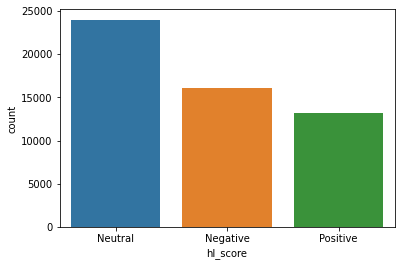

In [223]:
#perform countplot on headline score column

sns.countplot(all_headlines["hl_score"])

In the headlines

there are approx

14000 positive statment

16000 negative statment

24000 neutral statment

In [224]:
#perform pie digram on headline score column

import plotly.express as px
fig = px.pie(all_headlines, names = "hl_score", title = "Pie chart of different sentiments")
fig

In the dataset

headlines contains

24.8% positive statments

30.3% negtive statements

44.9% neutral statments

# Modeling on headlines

In [225]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212

x_train_hl, x_test_hl, y_train_hl, y_test_hl = train_test_split(all_headlines["Headlines"], all_headlines.hl_score, test_size = 0.1, random_state = 212)

LINEAR SUPPORT VECTOR MACHINE

In [232]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model
pipe = Pipeline([
                 ("tfidf", TfidfVectorizer()),
                 ("model", LinearSVC()) 
])

linear_svc_model_hl = pipe.fit(x_train_hl, y_train_hl)

# Fit the pipeline to the data
prediction = linear_svc_model_hl.predict(x_test_hl)
print("Model Linear SVC")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_hl, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_hl, prediction))
#print classification report
print(classification_report(y_test_hl, prediction))


Model Linear SVC
97.43
[[1572   34   40]
 [   2 2323    3]
 [  43   15 1294]]
              precision    recall  f1-score   support

    Negative       0.97      0.96      0.96      1646
     Neutral       0.98      1.00      0.99      2328
    Positive       0.97      0.96      0.96      1352

    accuracy                           0.97      5326
   macro avg       0.97      0.97      0.97      5326
weighted avg       0.97      0.97      0.97      5326

CPU times: user 2.66 s, sys: 10.5 ms, total: 2.67 s
Wall time: 3.09 s


LOGISTIC REGRESSION

In [233]:
%%time
# pipeline creation
# 1. TfidfTransformer
# 2. LogisticRegression model
# 3. CountVectorization
pipe = Pipeline([
                 ("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("model", LogisticRegression())
                 
])

log_reg_model_hl = pipe.fit(x_train_hl, y_train_hl)

# Fit the pipeline to the data
prediction = log_reg_model_hl.predict(x_test_hl)
print("Model LogisticRegression")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_hl, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_hl, prediction))
#print classification report
print(classification_report(y_test_hl, prediction))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model LogisticRegression
94.25
[[1481  112   53]
 [   3 2323    2]
 [  59   77 1216]]
              precision    recall  f1-score   support

    Negative       0.96      0.90      0.93      1646
     Neutral       0.92      1.00      0.96      2328
    Positive       0.96      0.90      0.93      1352

    accuracy                           0.94      5326
   macro avg       0.95      0.93      0.94      5326
weighted avg       0.94      0.94      0.94      5326

CPU times: user 7.39 s, sys: 4.03 s, total: 11.4 s
Wall time: 12.2 s


MULTINOMIAL NAIVE BAYES


In [234]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB
 
pipe = Pipeline([
                 ("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("model", MultinomialNB())
                 
])

nb_model_hl = pipe.fit(x_train_hl, y_train_hl)

# Fit the pipeline to the data
prediction = nb_model_hl.predict(x_test_hl)
print("Model Multinomial")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_hl, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_hl, prediction))
#print classification report
print(classification_report(y_test_hl, prediction))

Model Multinomial
84.3
[[1362  214   70]
 [  48 2255   25]
 [ 202  277  873]]
              precision    recall  f1-score   support

    Negative       0.84      0.83      0.84      1646
     Neutral       0.82      0.97      0.89      2328
    Positive       0.90      0.65      0.75      1352

    accuracy                           0.84      5326
   macro avg       0.86      0.81      0.83      5326
weighted avg       0.85      0.84      0.84      5326

CPU times: user 1.5 s, sys: 12.3 ms, total: 1.52 s
Wall time: 2.43 s


BERNOULLI NAIVE BAYES


In [241]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

pipe = Pipeline([
                 ("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("model", BernoulliNB())
                 
])

nb_model_ber_hl = pipe.fit(x_train_hl, y_train_hl)

# Fit the pipeline to the data
prediction = nb_model_ber_hl.predict(x_test_hl)
print("Model BernoulliNB")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_hl, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_hl, prediction))
#print classification report
print(classification_report(y_test_hl, prediction))

Model BernoulliNB
89.11
[[1452   63  131]
 [ 105 2153   70]
 [ 164   47 1141]]
              precision    recall  f1-score   support

    Negative       0.84      0.88      0.86      1646
     Neutral       0.95      0.92      0.94      2328
    Positive       0.85      0.84      0.85      1352

    accuracy                           0.89      5326
   macro avg       0.88      0.88      0.88      5326
weighted avg       0.89      0.89      0.89      5326

CPU times: user 1.42 s, sys: 12.9 ms, total: 1.43 s
Wall time: 1.75 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [235]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier
pipe = Pipeline([
                 ("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("model", GradientBoostingClassifier())
                 
])

gb_model_hl = pipe.fit(x_train_hl, y_train_hl)

# Fit the pipeline to the data
prediction = gb_model_hl.predict(x_test_hl)
print("Model BernoulliNB")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_hl, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_hl, prediction))
#print classification report
print(classification_report(y_test_hl, prediction))

Model BernoulliNB
81.04
[[1083  490   73]
 [   2 2324    2]
 [  61  382  909]]
              precision    recall  f1-score   support

    Negative       0.95      0.66      0.78      1646
     Neutral       0.73      1.00      0.84      2328
    Positive       0.92      0.67      0.78      1352

    accuracy                           0.81      5326
   macro avg       0.87      0.78      0.80      5326
weighted avg       0.84      0.81      0.81      5326

CPU times: user 1min 18s, sys: 360 ms, total: 1min 18s
Wall time: 2min 7s


XGBOOST CLASSIFICATION MODEL


In [236]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier
pipe = Pipeline([
                 ("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("model", XGBClassifier())
                 
])

xgb_model_hl = pipe.fit(x_train_hl, y_train_hl)

# Fit the pipeline to the data
prediction = xgb_model_hl.predict(x_test_hl)
print("Model BernoulliNB")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_hl, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_hl, prediction))
#print classification report
print(classification_report(y_test_hl, prediction))

Model BernoulliNB
76.15
[[ 957  619   70]
 [   0 2326    2]
 [  60  519  773]]
              precision    recall  f1-score   support

    Negative       0.94      0.58      0.72      1646
     Neutral       0.67      1.00      0.80      2328
    Positive       0.91      0.57      0.70      1352

    accuracy                           0.76      5326
   macro avg       0.84      0.72      0.74      5326
weighted avg       0.82      0.76      0.75      5326

CPU times: user 39 s, sys: 93.6 ms, total: 39 s
Wall time: 1min 4s


DECISION TREE CLASSIFICATION MODEL


In [237]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier
pipe = Pipeline([
                 ("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("model", DecisionTreeClassifier())
                 
])

dt_model_hl = pipe.fit(x_train_hl, y_train_hl)

# Fit the pipeline to the data
prediction = dt_model_hl.predict(x_test_hl)
print("Model BernoulliNB")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_hl, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_hl, prediction))
#print classification report
print(classification_report(y_test_hl, prediction))

Model BernoulliNB
95.72
[[1533   22   91]
 [   2 2323    3]
 [ 102    8 1242]]
              precision    recall  f1-score   support

    Negative       0.94      0.93      0.93      1646
     Neutral       0.99      1.00      0.99      2328
    Positive       0.93      0.92      0.92      1352

    accuracy                           0.96      5326
   macro avg       0.95      0.95      0.95      5326
weighted avg       0.96      0.96      0.96      5326

CPU times: user 30.1 s, sys: 76.8 ms, total: 30.2 s
Wall time: 58.3 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [238]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier
pipe = Pipeline([
                 ("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("model", KNeighborsClassifier())
                 
])

knn_model_hl= pipe.fit(x_train_hl, y_train_hl)

# Fit the pipeline to the data
prediction = knn_model_hl.predict(x_test_hl)
print("Model KNeighborsClassifier")
# predict on test dataset

# print accuracy score
print(round(accuracy_score(y_test_hl, prediction) * 100, 2))
#print confusion matrix
print(confusion_matrix(y_test_hl, prediction))
#print classification report
print(classification_report(y_test_hl, prediction))

Model KNeighborsClassifier
60.98
[[1007  530  109]
 [ 473 1717  138]
 [ 263  565  524]]
              precision    recall  f1-score   support

    Negative       0.58      0.61      0.59      1646
     Neutral       0.61      0.74      0.67      2328
    Positive       0.68      0.39      0.49      1352

    accuracy                           0.61      5326
   macro avg       0.62      0.58      0.59      5326
weighted avg       0.62      0.61      0.60      5326

CPU times: user 7.87 s, sys: 1.83 s, total: 9.69 s
Wall time: 16.6 s


In [239]:
# helper function for comparing models matric
def compare_models(models, names, x_train_hl, y_train_hl, x_test_hl, y_test_hl):

    # the libraries we need
    

    # create a dataframe with column matric and metric name as value
    for (model, name) in zip(models, names):
      print(name)
      y_pred = model.predict(x_test_hl)
      res = classification_report(y_pred, y_test_hl)
      print("Classification Report\n", res)
      print("-------------------------------------------------------------------------------------------")
   
    # then predict on the test set
    

In [242]:
# list of model objects
models = [linear_svc_model_hl,log_reg_model_hl,nb_model_hl, nb_model_ber_hl, gb_model_hl, xgb_model_hl, dt_model_hl,knn_model_hl]
# list of model names
names = ["linearSVC", "logistic", "MultinomialNB", "BernoulliNB", "GradientBoost", "XGB", "DecisionTree", "KNN"]
# print the comparison of models
compare_models(models, names, x_train_hl, y_train_hl, x_test_hl, y_test_hl)

linearSVC
Classification Report
               precision    recall  f1-score   support

    Negative       0.96      0.97      0.96      1617
     Neutral       1.00      0.98      0.99      2372
    Positive       0.96      0.97      0.96      1337

    accuracy                           0.97      5326
   macro avg       0.97      0.97      0.97      5326
weighted avg       0.97      0.97      0.97      5326

-------------------------------------------------------------------------------------------
logistic
Classification Report
               precision    recall  f1-score   support

    Negative       0.90      0.96      0.93      1543
     Neutral       1.00      0.92      0.96      2512
    Positive       0.90      0.96      0.93      1271

    accuracy                           0.94      5326
   macro avg       0.93      0.95      0.94      5326
weighted avg       0.95      0.94      0.94      5326

---------------------------------------------------------------------------------

# now working with test data

In [243]:
# Perforn the prediction on the test dataset
y_predicted = linear_svc_model_hl.predict(x_test_hl)
y_predicted

array(['Positive', 'Negative', 'Neutral', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [244]:
# creating a dataframe of predicted results 
result = pd.DataFrame(y_predicted)

In [245]:
result.head()

,0
0,Positive
1,Negative
2,Neutral
3,Negative
4,Neutral


# Prediction

you can check the result on real time news headlines

Here i have used two fiancial news headlines

and predicted its sentiment

You can try more 

In [246]:
sent1 = ['GST officers detect Rs 4,000 crore of ITC fraud in April-June']
y_predict = linear_svc_model_hl.predict(sent1)
y_predict

array(['Negative'], dtype=object)

In [247]:
sent2 = ["Finance Ministry releases Rs 9,871 crore to 17 states as grant"]
y_predict = linear_svc_model_hl.predict(sent2)
y_predict

array(['Positive'], dtype=object)

# Conclusion

We learn about NLTK, sentiment analysis in this assigment.

we conclude that using nltk it is easy to classify financial news and more we improve the traning data more we can get accurate


#Congratulation for completing the assignment.


You have learned a lot while doing this assignment.